# Setup

Para trabajar con geopandas debemos crear un **nuevo ambiente** en Anaconda e instalar algunas bibliotecas siguiendo estas instrucciones:

Desde Anaconda Prompt en Windows, y desde la terminal en Linux o Mac vamos a ejeutar una a una esats lineas:

<code>conda create --yes --name dhdsblend2021_geopandas python=3.7</code>

<code>conda activate dhdsblend2021_geopandas</code>

<code>conda install jupyterlab=2.2.6</code>

<code>conda install -c conda-forge pyproj=2.4.2.post1</code>

<code>conda install -c conda-forge descartes=1.1.0</code>

<code>conda install -c conda-forge geopandas=0.8.1</code>

<code>conda install -c conda-forge geopy=2.0.0</code>

Una vez instaladas las bibliotecas, **cerramos jupyter lab**, y volvemos a **iniciarlo desde el ambiente recién creado: dhdsblend2021_geopandas**

Después de hacer esto, los import de la siguiente celda deberán funcionar sin dar error.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# GeoPandas


<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

$\hspace{.5cm}$[Sistema de coordenadas geográficas](#section_coordenadas)

[Tipos de datos espaciales](#section_tipo_datos)

$\hspace{.5cm}$[Raster](#section_raster)

$\hspace{.5cm}$[Vectorial](#section_vectorial)

[Archivos de Datos Espaciales](#section_archivos)

$\hspace{.5cm}$[Ejemplos](#section_ejemplo_archivos)

---


## Sistemas de Información Geográfica (GIS)


<a id="section_intro"></a> 
###  Intro
[volver a TOC](#section_toc)

#### Documentación 
https://www.esri.cl/es-cl/que-es-el-gis/que-es-gis

Los **Sistemas de Información Geográfica (SIG)** (o GIS en inglés), se definen como sistemas que permiten almacenar datos geoespaciales para su consulta, manipulación y representación. La representación de estos datos es el campo de estudio de la *Cartografía*. A partir del trabajo con los SIG, nació una nueva disciplina científica, conocida como *Ciencia de la Información Geográfica*.

<div>
    <div class = "mapa">
        <img src='img/M1_Clase_07_1_001_SIG.jpg' alt="Ejemplo de SIG" width=30% height=40%>
        <p><i>Ejemplo de SIG</i></p>
    </div>
</div>

Los **Datos Geoespaciales**, también llamados información geográfica, geodatos o simplemente datos espaciales, son datos georreferenciados. La *georreferenciación* es la técnica de posicionamiento espacial de una entidad en una localización geográfica única y bien definida en un *sistema de coordenadas*.

Los geodatos poseen información *implícita* (cantidad de habitantes, una referencia catastral, una dirección postal, etc.) o *explícita* (coordenadas obtenidas a partir de datos capturados mediante GPS, etc.).

La razón fundamental para utilizar un SIG (GIS en inglés) es la gestión de la información geoespacial. El sistema permite separar la información en diferentes capas temáticas y las almacena independientemente.


<div class = "mapa">
    <img src='img/M1_Clase_07_1_002_Capas.PNG' alt="Varias capas temáticas" width=30% height=40%>
    <p><i>Varias capas temáticas</i></p>
</div>


Ejemplos de uso de SIG: localización de lugares, cálculo de rutas óptimas, relación entre localidades usando variables geoespaciales asociadas a ellas, por ejemplo, pozos petroleros cercanos con igual profundidad, etc.

<a id="section_coordenadas"></a> 
### Sistema de coordenadas geográficas
[volver a TOC](#section_toc)

El sistema más usual es el que referencia una posición espacial mediante su <i>latitud</i> y <i>longitud</i>.
      
Si consideramos a la Tierra como una esfera (o esferoide), existen dos líneas fundamentales: el <i>meridiano de Greenwich</i>, que va de un polo a otro, y el <i>Ecuador</i>, que cruza al eje de rotación por el centro de la esfera. Las líneas paralelas al Ecuador se denominan <b>latitud</b>, y las lineas paralelas a Greenwich, <b>longitud</b>.
      

<div class = "mapa">
    <img src='img/M1_Clase_07_1_008_Latitud_Longitud.PNG' alt="Latitud y Longitud" width=40% height=30%>
    <p><i>Latitud y Longitud</i></p>
</div>

      
La <i>latitud</i> se indica con valores positivos entre 0 y 90 para las líneas al norte del Ecuador, y con valores negativos entre 0 y -90 para las que están al sur. Otra forma de nombrarlas es usando siempre un valor positivo entre 0 y 90, y agregando si corresponde al Norte o al Sur.
      
La <i>longitud</i> se indica en forma similar, pero con valores positivos entre 0 y 180 para las líneas al este de Greenwich, y con valores negativos entre 0 y -180 para las que están al oeste. Otra forma de nombrarlas es usando siempre un valor positivo entre 0 y 180, y agregando si corresponde al este o al oeste.

<div id="caja" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>
      <p><i>También se pueden usar como coordenadas geográficas una medida que use grados, minutos y segundos.</i> Se necesitan dos datos: cuantos grados respecto al Ecuador, hacia el Norte o el Sur, y cuantos grados respecto al Meridiano de Greenwich, hacia el Este u el Oeste.</p>
    
<div>
    <div class = "mapa">
        <img src='img/M1_Clase_07_1_009_Medicion.PNG' alt="Referencia a Latitud y Longitud" width=50% height=40%>
        <p><i>Relación entre mediciones</i></p>
    </div>
</div> 

<div>
    <div class = "mapa">
        <img src='img/M1_Clase_07_1_010_Bogota.PNG' alt="Coordenadas de Bogotá" width=85% height=40%>
        <p><i>Coordenadas de Bogotá, según las distintas mediciones: Coordenadas decimales indica su latitud y longitud; GMS su medición en grados. </i></p>
    </div>
</div> 

</label></div>
</div>

<a id="section_tipo_datos"></a> 
### Tipos de Datos Geoespaciales
[volver a TOC](#section_toc)

Existen dos tipos de datos geoespaciales en un SIG: *raster* y *vectorial*.

<a id="section_raster"></a> 
#### Tipos de Datos Raster
[volver a TOC](#section_toc)

El tipo de datos **raster** es lo que consideramos imagenes digitales, o mapas. Se representan mediante mallas o cuadriculas; divide el espacio en celdas regulares donde cada una de ellas representa un único valor. Similar a la fotografía digital donde el píxel es la unidad menor de información de una imagen, y una combinación de estos píxeles crea una imagen. 

Este tipo de datos se centra en las propiedades del espacio, por ejemplo, elevaciones sobre un terreno, nivel de luz, variedad de cultivos. No siendo tan precisos en la localizacion en el espacio.

<div>
    <div class = "mapa">
        <img src='img/M1_Clase_07_1_003_Mapa.PNG' alt="Tipo de dato Raster" width=30% height=40%>
        <p><i>Tipo de dato Raster</i></p>
    </div>
    <div class = "mapa">
        <img src='img/M1_Clase_07_1_004_Mapa_Pixel.PNG' alt="Tipo de dato Raster pixelado" width=30% height=40%>
        <p><i>Tipo de dato Raster pixelado</i></p>
    </div>
</div>

<a id="section_vectorial"></a> 
#### Tipos de Datos Vectorial
[volver a TOC](#section_toc)

El tipo de datos **vectorial** representan objetos que provienen de diversas fuentes: localidades, negocios, barrios, rutas, nivel de contaminación, etc. Son datos discretos, es decir, con limites definidos. Y con una localizacion precisa sobre el espacio. 

<div>
    <div class = "mapa">
        <img src='img/M1_Clase_07_1_005_Vectorial.PNG' alt="Tipo de dato Vectorial" width=30% height=40%>
        <p><i>Tipo de dato Vectorial</i></p>
    </div>
</div>

Para modelar digitalmente los objetos se utilizan tres elementos geométricos: el punto, la línea y el polígono.

<div>
    <div class = "mapa">
        <img src='img/M1_Clase_07_1_006_Vectorial.PNG' alt="Elementos geométricos" width=30% height=40%>
        <p><i>Elementos geométricos</i></p>
    </div>
</div>

Los **puntos** se utilizan para las entidades geográficas que mejor pueden ser expresadas por un único punto de referencia. Por ejemplo, estaciones de subte, edificios, localizaciones de los pozos, puntos de interés.

Las **líneas unidimensionales o polilíneas** son usadas para rasgos lineales como ríos, caminos, ferrocarriles, líneas topográficas o curvas de nivel. En los elementos lineales puede medirse la *distancia*.

Los **polígonos** se utilizan para representar elementos geográficos que cubren un área particular de la superficie de la tierra. Por ejemplo, lagos, límites de parques naturales, yacimientos, provincias. Con ellos se pueden medir el *perímetro* y el *área*.

Recordar que en ambos tipos de datos necesitamos las coordenadas de su ubicación geográfica.

<div>
    <div class = "mapa">
        <img src='img/M1_Clase_07_1_007_Mapa_Combinado.PNG' alt="Tipo de datos combinados" width=40% height=50%>
        <p><i>Tipo de datos combinados. Raster y Vectorial</i></p>
    </div>
</div>

<a id="section_archivos"></a> 
### Archivos de Datos Geoespaciales
[volver a TOC](#section_toc)

En general, se denomina formato SIG a los formatos de archivos con datos geoespaciales.

Los datos geoespaciales de tipo *raster* se almacenan en los tipos de archivos que conocemos para almacenar imágenes. Por ejemplo, los formatos TIFF, JPEG, PNG, etc. 

Los datos geoespaciales de tipo *vectorial* más comunes son: 

- SHP (Shapefile)

  El archivo shapefile es el tipo de archivo geoespacial más común. Todos los formatos comerciales y de código abierto aceptan shapefile como formatos SIG. Se ha convertido en el estándar de la industria.
  
   No es un único archivo, un shapefile se compone de varios archivos que se leen como uno único. El mínimo requerido es de tres: el .shp almacena las entidades geométricas, el .shx almacena el índice de las entidades geométricas y el .dbf es la base de datos, en formato dBASE. Opcionalmente puede tener un .prj, .sbn, .sbx, .fbn, .fbx .ain, .aih, .shp.xml.

- CSV / GeoCSV

  CSV (Comma-separated values) representa datos en forma de tabla separados por comas. Sirve para almacenar información alfanumérica con la posibilidad de almacenar las coordenadas y posteriormente transformarlo en una figura geometrica. Es usual encontrarlos en publicaciones de organismos, por ejemplo https://data.buenosaires.gob.ar/dataset. 

  La ventaja es que estos ficheros ocupan poco espacio y es fácil compartirlos.

  GeoCSV es el formato de archivo tabular CSV con una extensión opcional de geometría espacial. Tiene dos variantes: la opción Punto X/Y o la opción WKT.

  - La opción WKT es la preferida, ya que se almacena en una única columna de tipo String el constructor, por ejemplo «POINT (-4.5454 45.2211)», lo que significa -4.5454 oeste y 45.2211 norte (longitud/latitud). Esta opción soporta los tipos de geometría Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon e incluso GeometryCollection y ARCos.

  - La opción Punto X/Y solo puede almacenar puntos.

- GeoJSON (Javascript Object Notation)

  Es un formato de intercambio de datos geoespaciales basado en JSON. GeoJSON define la gramática basada en el estandar WKT.

- KMZ/KML (Keyhole Markup Language)

  KML significa Keyhole Markup Language. Este formato SIG está basado en XML y lo utiliza principalmente Google Earth. KML fue desarrollado por Keyhole Inc., que más tarde fue adquirida por Google. KMZ (KML-Zipped) reemplazó a KML como el formato geoespacial predeterminado de Google Earth porque es una versión comprimida del archivo. KML/KMZ se convirtió en un estándar internacional del Open Geospatial Consortium en 2008.

- OSM (OpenStreetMap)

  OpenStreetMap es el mayor proyecto de datos abiertos GIS que proporciona datos de mapas para miles de sitios web, aplicaciones móviles y dispositivos de hardware.

- PostGIS + PostgreSQL

  Open Source PostGIS extiende la base de datos PostgreSQL con datos geoespaciales.

<div id="caja4" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Con <b>GeoPandas</b> se pueden leer muchos de estos tipos de archivos usando la función geopandas.read_file.</label></div>
</div>


<a id="section_ejemplo_archivos"></a> 
#### Ejemplos de archivos de datos geoespaciales
[volver a TOC](#section_toc)

- Archivo con formato GeoCSV.
  Es un archivo csv, con datos de los barrios de Buenos Aires, con una extension geoespacial que se registra en la columna WKT. Esta columna contiene el elemento geométrico *Poligono* que representa el límite de cada barrio.

In [2]:
barrios = gpd.read_file("../Data/barrios.csv", encoding='latin1')
barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,geometry
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.00000000000,7725.69522770465,3118100.97239645380,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5..."
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.00000000000,7087.51329532852,2229829.03362795900,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.00000000000,8132.69934845057,3613583.69021913320,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.00000000000,7705.38979708046,3399595.64148383770,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.00000000000,8537.90136849144,4050752.24523803680,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."


- Archivo con el formato SHP.
  Genera un data frame con una columna especial llamada geometry, que contiene la figura geoespacial. En este caso son dos poligonos que conforman el contorno de una parque nacional.

In [3]:
parque = gpd.read_file("../Data/parque_reserva.shp")
parque.head()

,geometry
0,"POLYGON ((756107.121 7150870.957, 756106.485 7..."
1,"POLYGON ((756107.121 7150870.957, 756115.780 7..."


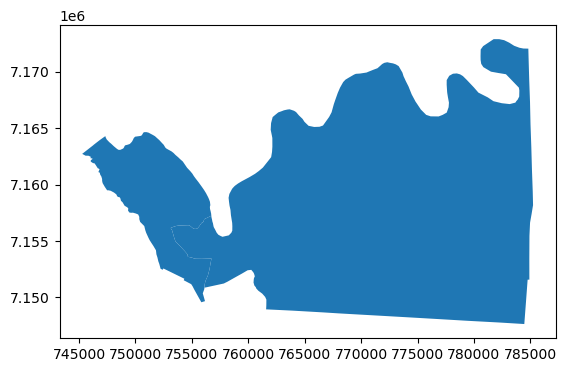

In [4]:
parque.plot()

<div id="caja5" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>   
Leer el archivo "../Data/estaciones-de-subte.csv" y explicar el contenido. Que tipo de archivo geoespacial es? Que formato tiene?
</label></div>
</div>

In [8]:
estaciones = gpd.read_file("../Data/estaciones-de-subte.csv", encoding='latin1')
estaciones.head()

,long,lat,id,estacion,linea,geometry
0,-58.3989275853601,-34.635750180343,1.0,CASEROS,H,None
1,-58.4009695560165,-34.6293756575728,2.0,INCLAN - MEZQUITA AL AHMAD,H,None
2,-58.402322730424,-34.6230923205019,3.0,HUMBERTO 1Â°,H,None
3,-58.40473171649,-34.6152421522706,4.0,VENEZUELA,H,None
4,-58.4060363810352,-34.6089352416215,5.0,ONCE - 30 DE DICIEMBRE,H,None


Es un archivo de tipo csv con la longitud y latitud especifica de las estaciones de subway de buenos aires.

---

<a id="section_referencias"></a> 
### Referencias
[volver a TOC](#section_toc)

Sistemas de Información Geográfica

https://www.um.es/geograf/sigmur/sigpdf/temario.pdf

http://www.iirsa.org/admin_iirsa_web/Uploads/Documents/geo_baires09_sig.pdf

Formatos SIG

https://mappinggis.com/2013/11/los-formatos-gis-vectoriales-mas-populares/

Open Street Map

https://www.openstreetmap.org/

Post GIS

https://postgis.net/

Geopandas Documentacion

https://geopandas.org/index.html